 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/python/learnpy2/A_Simple_PyTorch_NeuralNet_Example.ipynb#Implementing-a-Simple-Neural-Network-with-Numpy" data-toc-modified-id="Implementing-a-Simple-Neural-Network-with-Numpy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Implementing a Simple Neural Network with Numpy</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/python/learnpy2/A_Simple_PyTorch_NeuralNet_Example.ipynb#Further-Reading" data-toc-modified-id="Further-Reading-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Further Reading</a></span></li></ul></li></ul></div>

# Implementing a Simple Neural Network with Numpy

Mostly based upon [Learning PyTorch with Examples in PyTorch Docs](http://pytorch.org/tutorials/beginner/pytorch_with_examples.html#pytorch-tensors)

Partially based on CS231n notes [here](http://cs231n.github.io/neural-networks-case-study/)

In [1]:
import sys
sys.version

'3.6.3 |Anaconda, Inc.| (default, Nov  8 2017, 15:10:56) [MSC v.1900 64 bit (AMD64)]'

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import torch

%matplotlib inline
torch.__version__

'0.3.1.post2'

In [9]:
debug = False

# Data type
dtype = torch.FloatTensor

# Is GPU available
# For drivers see https://docs.nvidia.com/cuda/cuda-installation-guide-microsoft-windows/index.html
# May need to reboot computer after driver update!
if torch.cuda.is_available():
    print('cuda')
    dtype = torch.cuda.FloatTensor

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 2, 100, 2

# Create random input and output data
X = torch.randn(N, D_in).type(dtype)
# y_rand = torch.randn(N, D_out).type(dtype)
y_rand = np.random.randn(N, D_out)

# Create blobs
X, y_label = make_blobs(n_samples=N, centers=2, n_features=D_in,
                  random_state=0 )
# convert blobs to pytorch tensors
X = torch.from_numpy(X).type(dtype)

# convert y to appropriate dim and type
y_rand *= y_label[:, None]

y = torch.from_numpy(y_rand).type(dtype)

# Randomly initialize weights
W1 = torch.randn(D_in, H).type(dtype)
W2 = torch.randn(H, D_out).type(dtype)

learning_rate = 1e-6

# Vector to which loss over training is saved
loss_vec = []

# Epochs
epochs = 10000

cuda


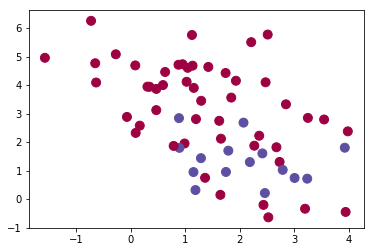

In [4]:
# ### Visualize data ###
plt.scatter(X[:, 0], X[:, 1], c=[np.argmax(x) for x in y], s=80, cmap=plt.cm.Spectral)
plt.show()

In [5]:

### Train neural net ###
for t in range(epochs):
    # Forward pass: compute predicted y
    h = X.mm(W1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(W2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 1000 == 0:
        print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(W2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = X.t().mm(grad_h)

    # Update weights using gradient descent
    W1 -= learning_rate * grad_w1
    W2 -= learning_rate * grad_w2
    
    loss_vec.append(loss)

0 150738.296875
1000 115.25130462646484
2000 89.09902954101562
3000 78.3101577758789
4000 71.61137390136719
5000 66.87321472167969
6000 63.69078826904297
7000 61.36917495727539
8000 59.582035064697266
9000 58.146644592285156


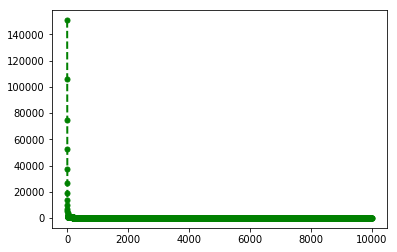

In [6]:
plt.plot(range(epochs), loss_vec, 'go--', linewidth=2, markersize=5)

(-1.6385800242424011, 7.241419975757607)

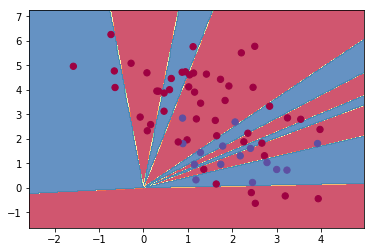

In [7]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1)), W2)
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=[np.argmax(x) for x in y], s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [8]:
### Evaluate ###
# evaluate training set accuracy
h = X.mm(W1)
# apply an activation function (ReLU) to the output of first layer
h_relu = h.clamp(min=0)
# calculate class scores
scores = h_relu.mm(W2)
# predict with these weights
_, predicted_class = scores.max(1)
predicted_class = predicted_class.type(dtype)
print('training accuracy: %.2f' % (predicted_class.eq(torch.from_numpy(np.array([np.argmax(x) for x in y])).type(dtype)).sum() / N))

training accuracy: 0.66


## Further Reading

1. Nice article on loss functions and optimization/optimizers [Ref](https://medium.com/data-science-group-iitr/loss-functions-and-optimization-algorithms-demystified-bb92daff331c)